In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
X = df[['PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [14]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [15]:
df['Species'] = df['Species'].replace({'Iris-setosa': 'setosa', 'Iris-versicolor': 'versicolor', 'Iris-virginica': 'virginica'})
df['Species'].value_counts()

,count
Species,
setosa,50
versicolor,50
virginica,50


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [17]:
df['Species'].value_counts()
#

,count
Species,
0,50
1,50
2,50


In [21]:
y = df['Species']
y.value_counts()

,count
Species,
0,50
1,50
2,50


In [24]:
X.shape, y.shape

((150, 2), (150,))

In [25]:
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_val, X_test, y_val, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=42)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [29]:
y = (y==0)

In [33]:
y = y.astype(int)

In [35]:
y.value_counts()

,count
Species,
0,100
1,50


In [38]:
model = keras.models.Sequential([
    layers.Flatten(input_shape=X_train.shape[1:], name='Input_layer'),
    layers.Dense(64, activation='relu', name='Hidden_layer_1'),
    layers.Dense(32, activation='relu', name='Hidden_layer_2'),
    layers.Dense(16, activation='relu', name='Hidden_layer_3'),
    layers.Dense(1, activation='sigmoid', name='Output_layer'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
from keras.optimizers import Adam

In [43]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])

In [44]:
history = model.fit(X_train,y_train, epochs=10,batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - accuracy: 0.3587 - loss: 0.7532 - val_accuracy: 0.3333 - val_loss: 0.7514
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.3646 - loss: 0.7155 - val_accuracy: 0.4000 - val_loss: 0.7075
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4201 - loss: 0.6849 - val_accuracy: 0.4667 - val_loss: 0.6638
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5601 - loss: 0.6468 - val_accuracy: 0.4667 - val_loss: 0.6284
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6128 - loss: 0.6150 - val_accuracy: 0.5333 - val_loss: 0.5972
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5979 - loss: 0.5945 - val_accuracy: 0.5333 - val_loss: 0.5666
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6403 - loss: 0.5684 - val_accuracy: 0.5333 - val_loss: 0.5366
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6194 - loss: 0.5500 - val_accuracy: 0.5333 - val_loss: 0.5079

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_1 (Dense)          │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_3 (Dense)          │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,453 (33.02 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,636 (22.02 KB)

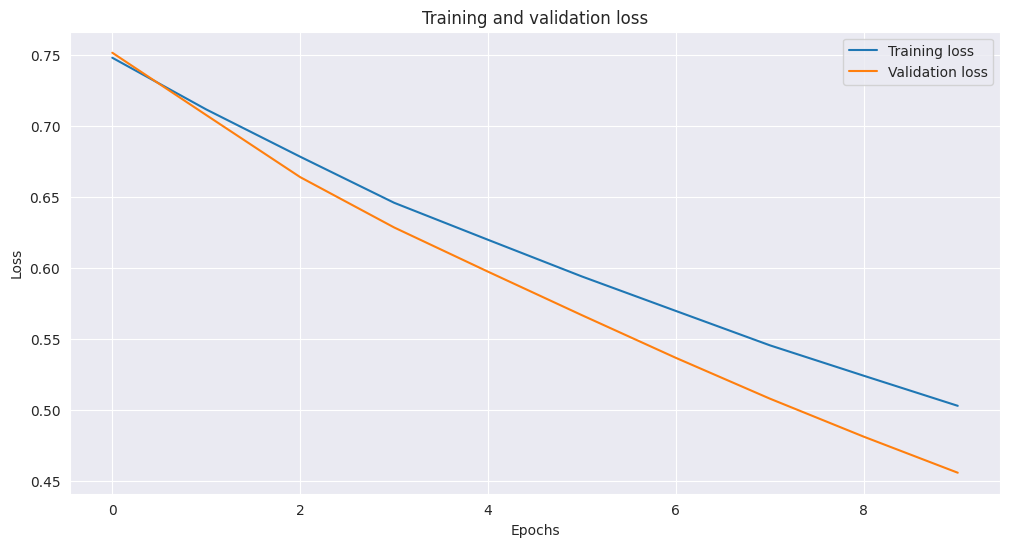

In [50]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [54]:
loss,accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy*100:.4f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.6667 - loss: 0.4836
Test loss: 0.4836
Test accuracy: 66.6667%


In [57]:
y_prob = model.predict(X_test)
# y_pred = (y_prob > 0.5).astype(int)
y_prob.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[0.54],
       [0.52],
       [0.54],
       [0.5 ],
       [0.52],
       [0.51],
       [0.25],
       [0.53],
       [0.23],
       [0.51],
       [0.52],
       [0.54],
       [0.26],
       [0.24],
       [0.23]], dtype=float32)

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Test Acc: {accuracy_score(y_test,y_pred)*100:.2f}%')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')

Test Acc: 66.67%
Confusion Matrix:
[[5 0 0]
 [1 5 0]
 [0 4 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.56      0.83      0.67         6
           2       0.00      0.00      0.00         4

    accuracy                           0.67        15
   macro avg       0.46      0.61      0.53        15
weighted avg       0.50      0.67      0.57        15



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
